## Shenzhen Winter Camp Homework 1


#### John Stachurski

In [11]:
import numpy as np
import quantecon as qe
import matplotlib.pyplot as plt
from scipy.linalg import eigvals
from numba import jit

### Exercise 1

Let $X$ be an $n \times n$ matrix with all positive elements.  The spectral radius $r(X)$ of $X$ is maximum of $|\lambda|$ over all eigenvalues $\lambda$ of $X$, where $|\cdot|$ is the modulus of a complex number.

A version of the **local spectral radius theorem** states that if $X$ has all positive entries and $v$ is any strictly positive $n \times 1$ vector, then

$$
    \lim_{i \to \infty} \| X^i v \|^{1/i} \to r(X) 
    \qquad \qquad \text{(LSR)}
$$

where $\| \cdot \|$ is the usual Euclidean norm.

Intuitively, the norm of the iterates of a positive vector scale like $r(X)$ asymptotically.

The data file `matrix_data.txt` contains the data for a single matrix $X$.  

1. Read it in and compute the spectral raduis using the tools for working with eigenvalues in `scipy.linalg`.

2. Test the claim in (LSR) iteratively, computing $\| X^i v \|^{1/i}$ for successively larger values of $i$.  See if the sequence so generated converges to $r(A)$.

In [2]:
!cat matrix_data.txt

5.643750010395732764e-01 1.692960892133389128e-01 6.683708744252630455e-04 1.389864248706673609e-08 1.170829457369152268e-15 0.000000000000000000e+00 0.000000000000000000e+00 0.000000000000000000e+00 0.000000000000000000e+00 0.000000000000000000e+00
4.632882898265253818e-02 5.641673663703478114e-01 1.558678202520563660e-01 5.041511365109471775e-04 8.437283142466194301e-09 6.139660181576728660e-16 0.000000000000000000e+00 0.000000000000000000e+00 0.000000000000000000e+00 0.000000000000000000e+00
5.057045828747336493e-05 5.827577815774982045e-02 6.016262054592469433e-01 1.424717506155509517e-01 3.770638996899374775e-04 5.076910586063219514e-09 3.219548919612956561e-16 0.000000000000000000e+00 0.000000000000000000e+00 0.000000000000000000e+00
3.968889156112886823e-10 7.762221762972721056e-05 7.279535037517061158e-02 6.380047468572456193e-01 1.292783343874331914e-01 2.796212783055623233e-04 3.028029115488102967e-09 1.125523230844239784e-16 0.000000000000000000e+00 0.000000000000000000e+00


In [3]:
X = np.loadtxt('matrix_data.txt')

In [4]:
n, _ = X.shape

Using tools in `scipy.linalg`

In [5]:
np.max(np.abs(eigvals(X)))

1.0044277694480632

Iteratively:

In [6]:
tol = 1e-9
iter_max = 40000
sr_estimate = 1.0
error = tol + 1
X_power = X
i = 1
o = np.ones((n, 1))
while error > tol and i < iter_max:
    new_estimate = (np.linalg.norm(X_power @ o))**(1/i)
    error = np.abs(sr_estimate - new_estimate)
    X_power = X_power @ X
    i += 1
    sr_estimate = new_estimate
    
print(sr_estimate)

1.004462415


In [7]:
i

34650

### Exercise 2

Recall that the quadratic map generates time series of the form

$$ x_{t+1} = 4 \, x_t (1 - x_t) $$

for some given $x_0$, and that these trajectories are chaotic.

This means that different initial conditions generate seemingly very different outcomes.

Nevertheless, the regions of the state space where these trajectories spend most of their time are in fact typically invariant to the initial condition.

Illustrate this by generating 100 histograms of time series generated from the quadratic map, with $x_0$ drawn independently from the uniform distribution on $(0, 1)$.  

Do they all look alike?

Try to make your code efficient.



In [12]:
@jit(nopython=True)
def quadmap_series(x0, n, x_vec):
    n = len(x_vec)
    x_vec[0] = x0
    for t in range(n-1):
        x_vec[t+1] = 4.0 * x_vec[t] * (1 - x_vec[t])
    

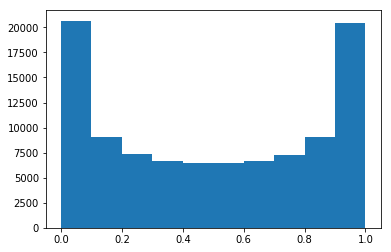

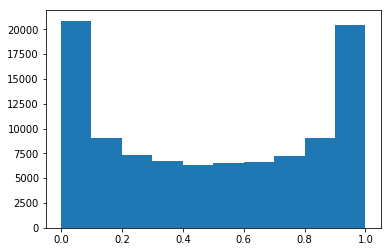

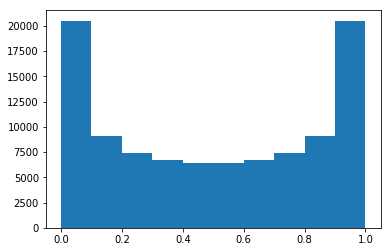

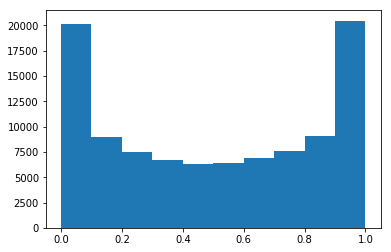

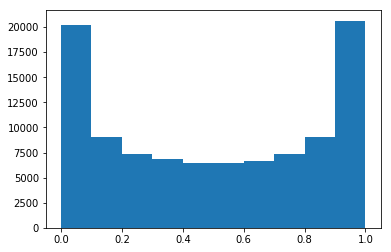

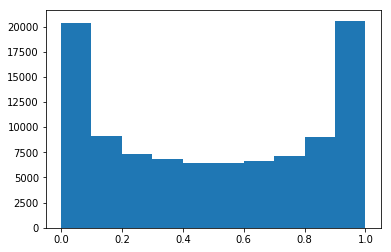

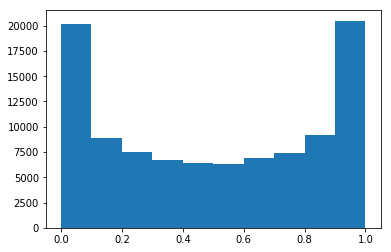

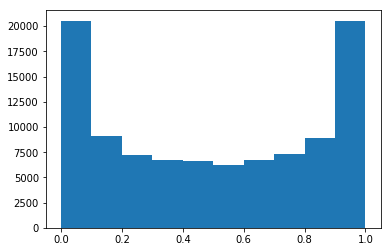

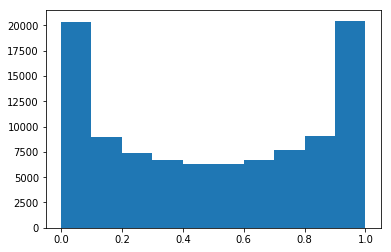

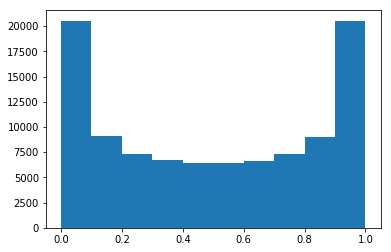

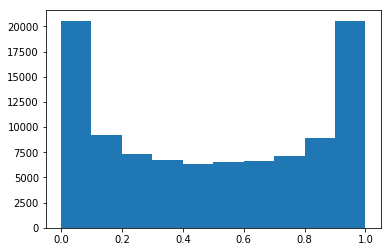

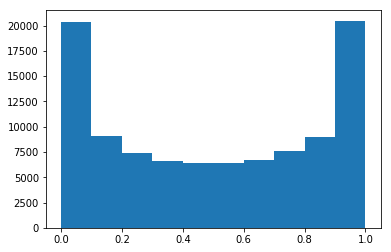

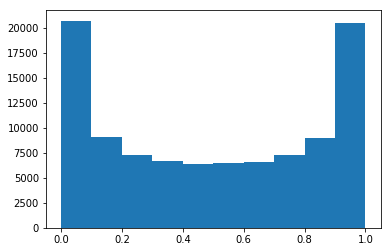

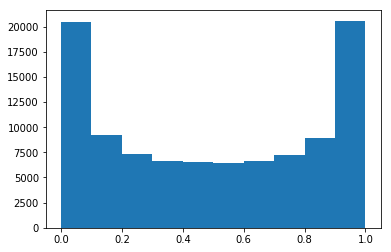

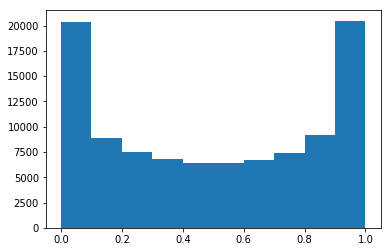

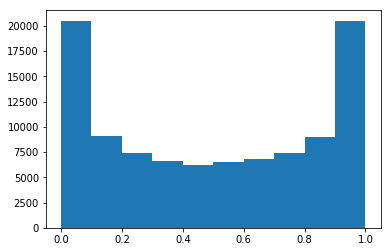

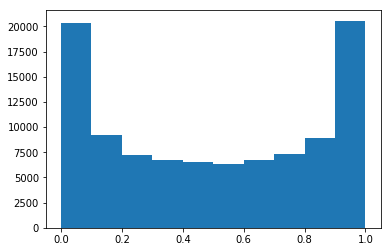

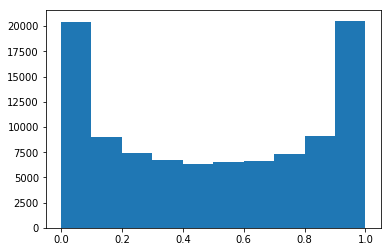

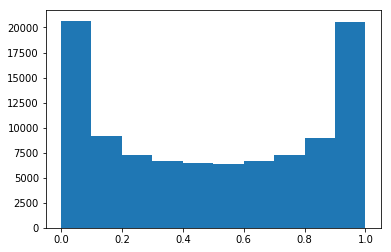

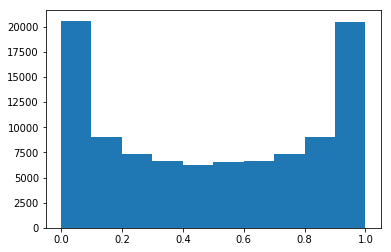

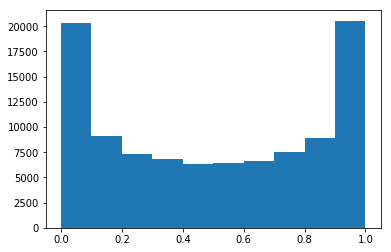

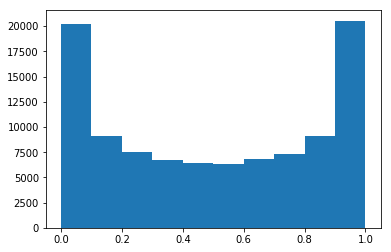

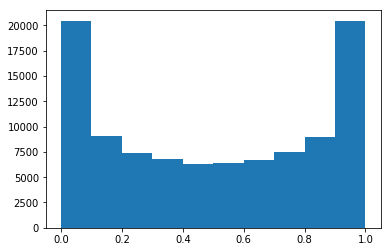

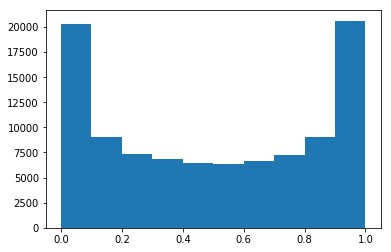

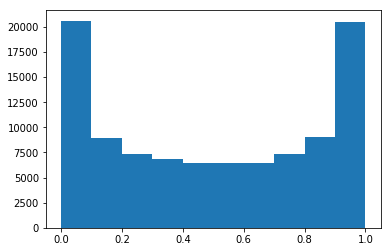

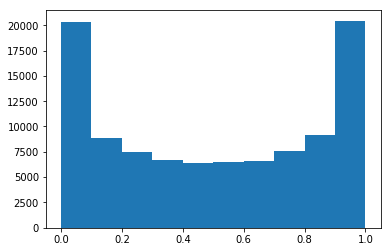

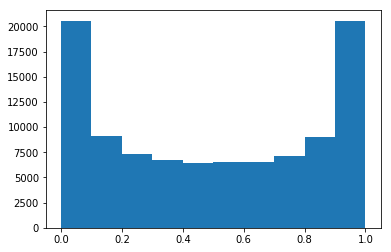

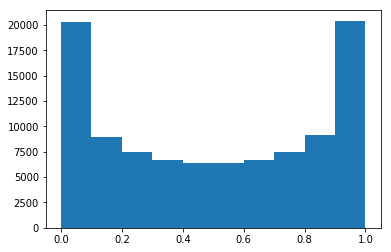

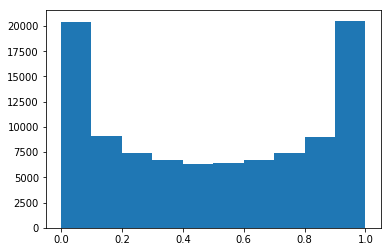

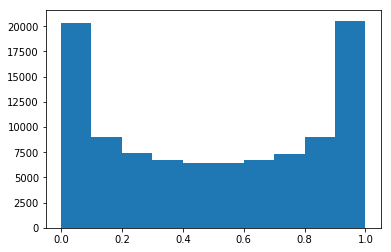

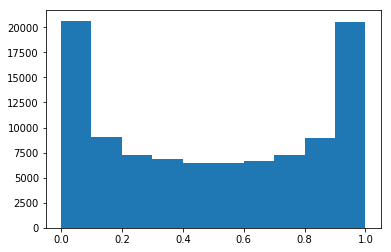

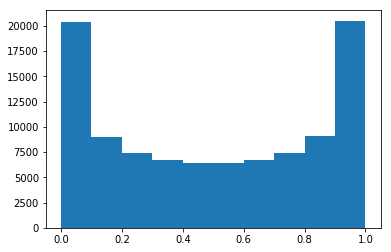

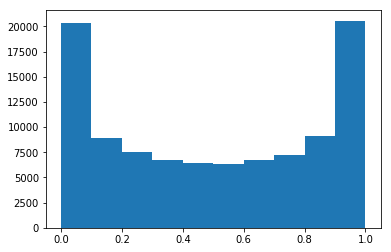

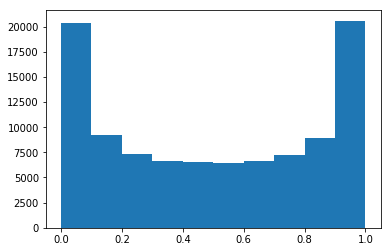

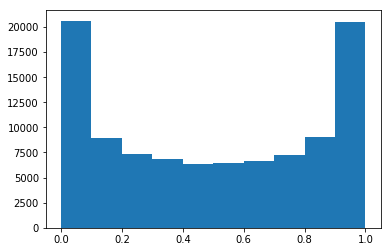

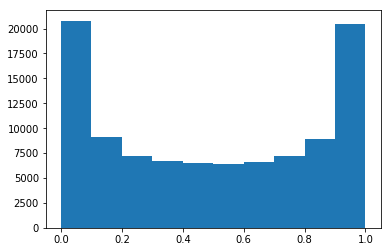

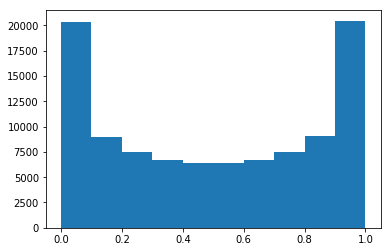

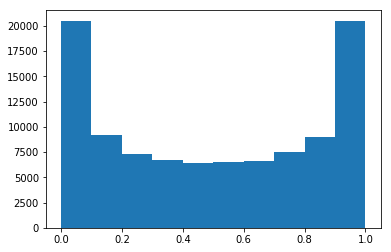

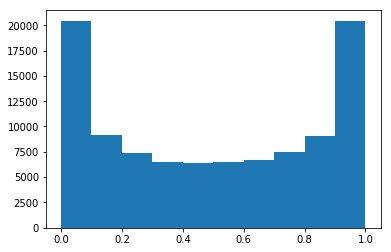

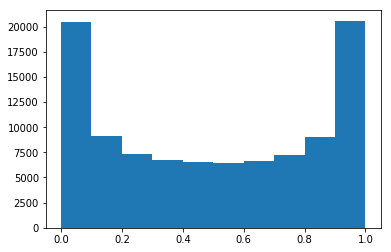

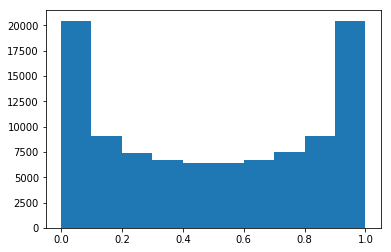

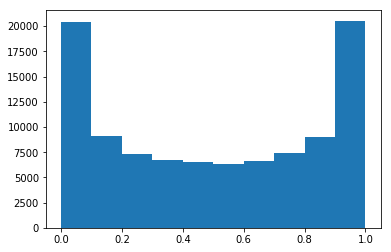

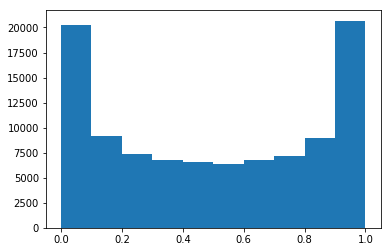

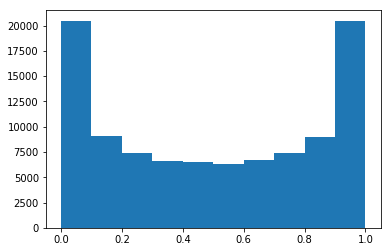

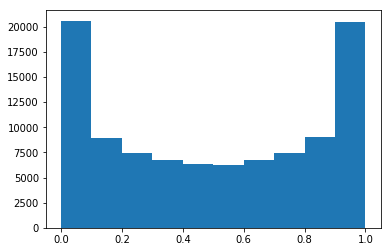

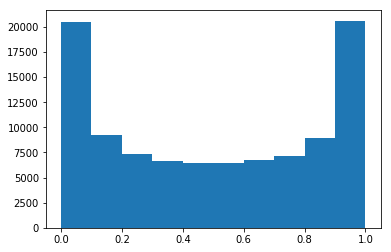

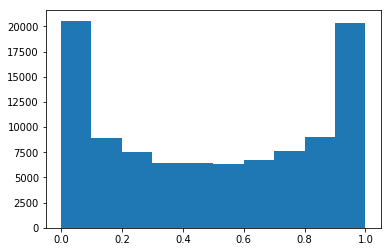

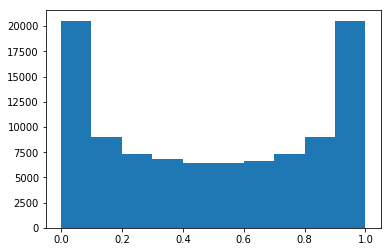

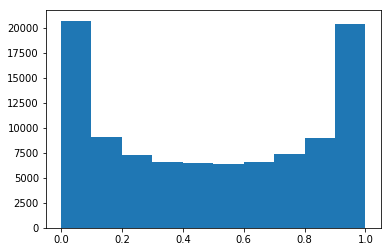

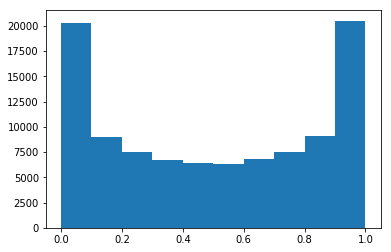

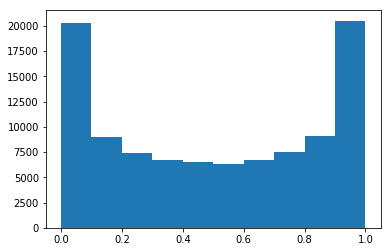

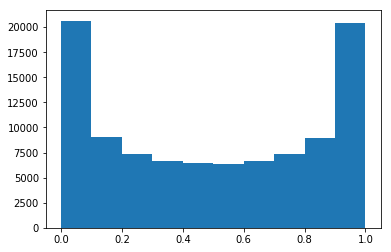

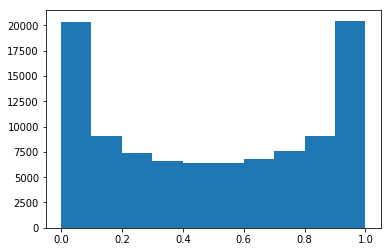

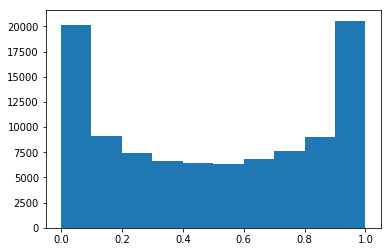

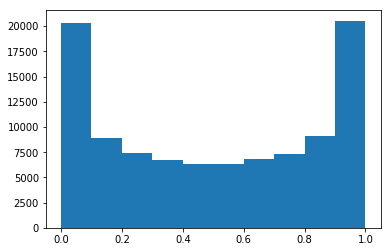

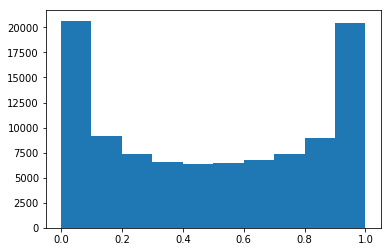

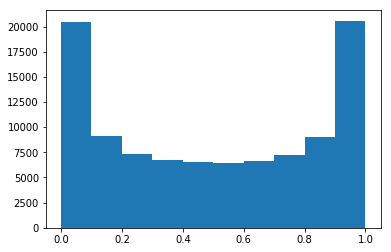

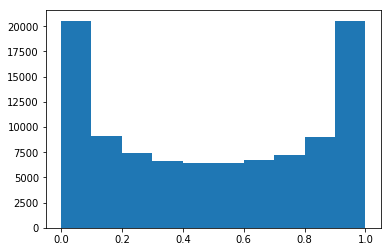

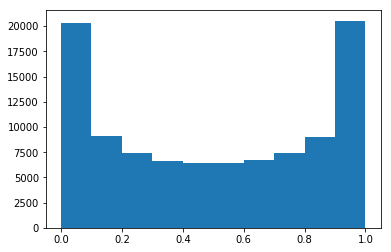

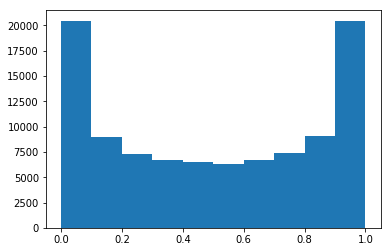

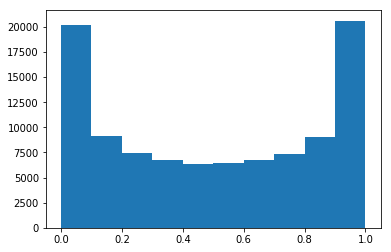

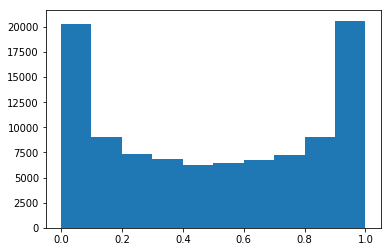

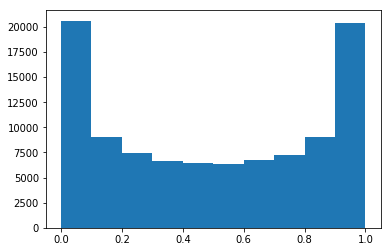

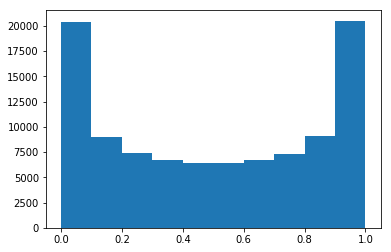

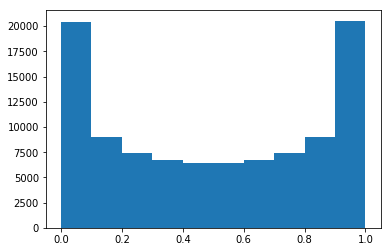

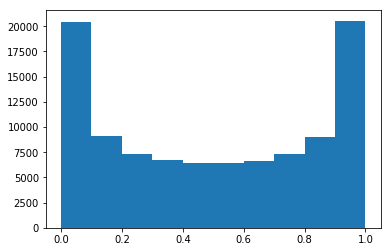

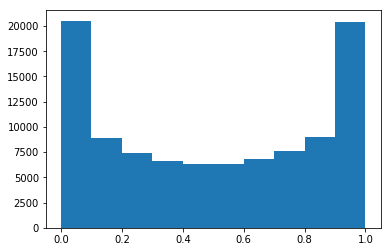

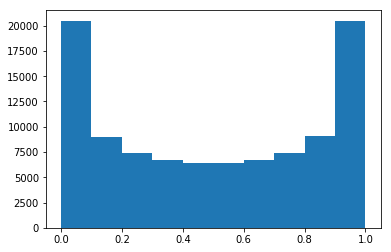

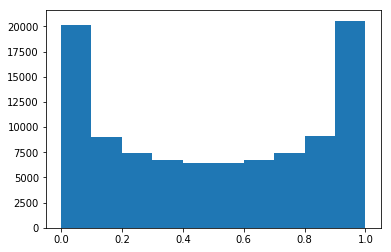

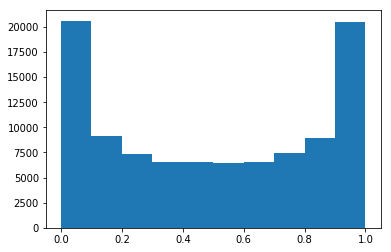

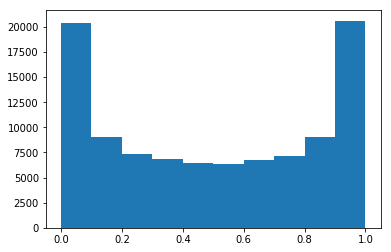

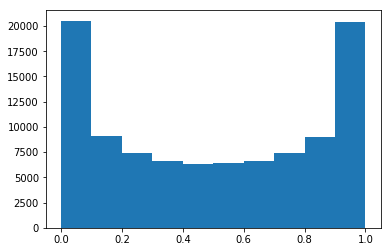

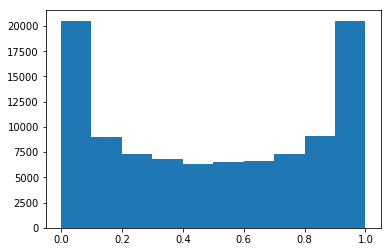

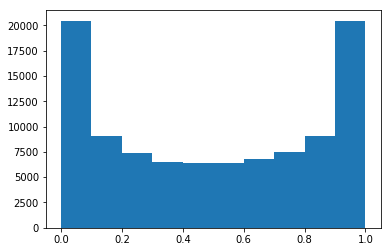

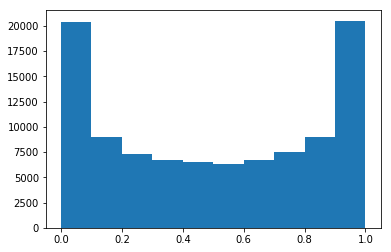

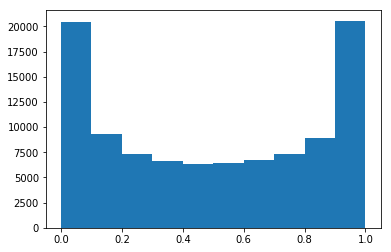

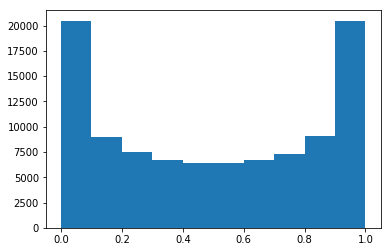

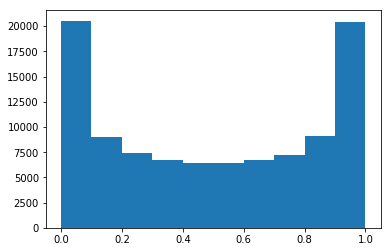

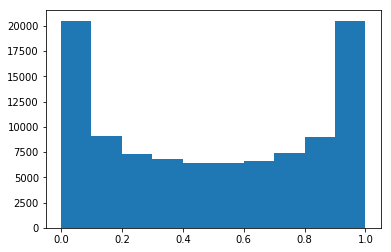

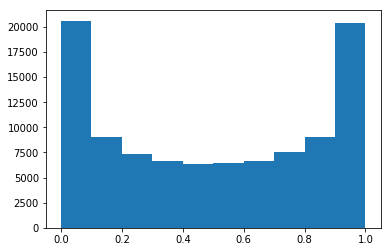

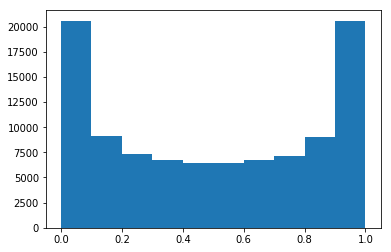

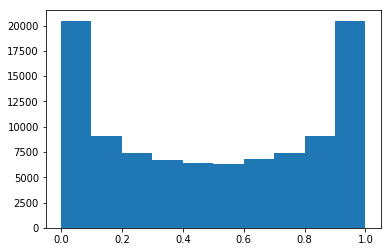

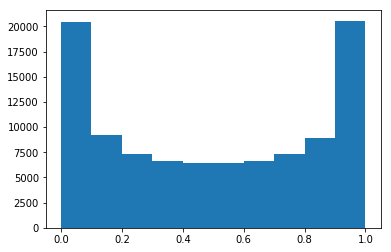

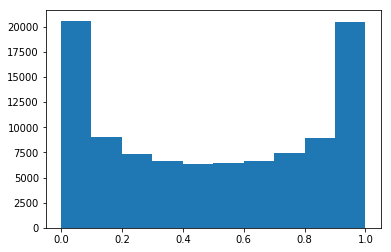

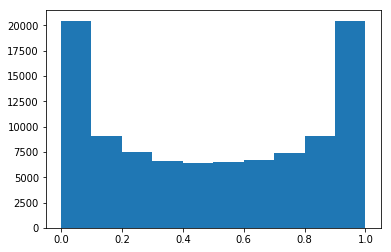

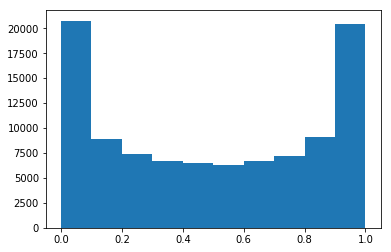

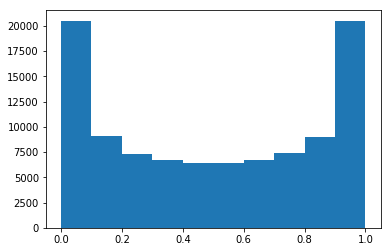

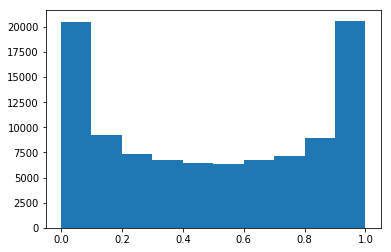

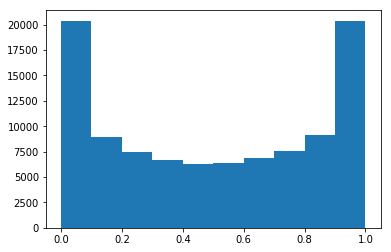

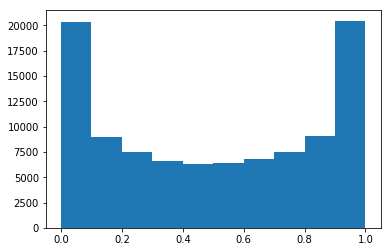

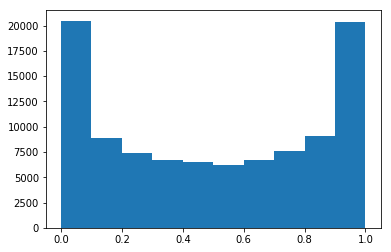

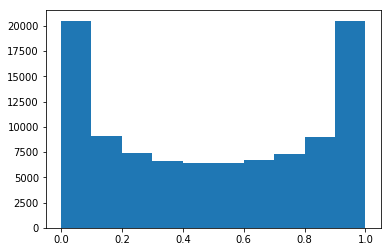

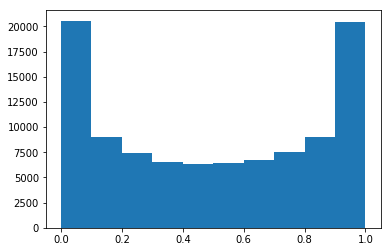

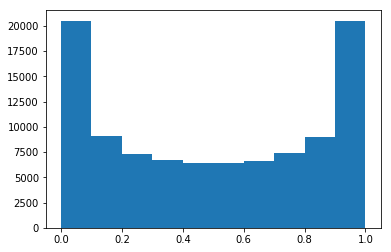

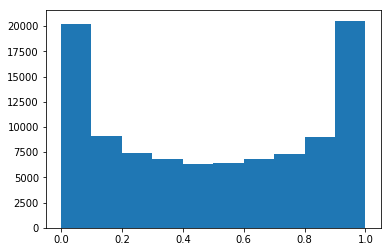

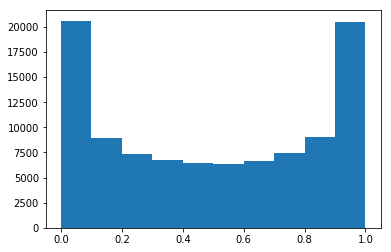

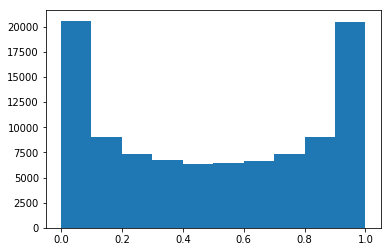

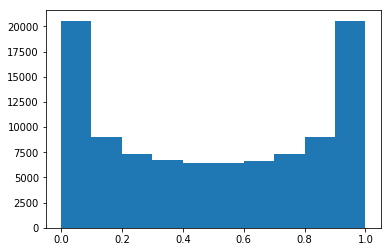

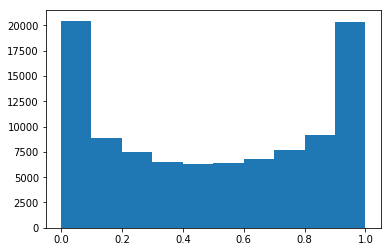

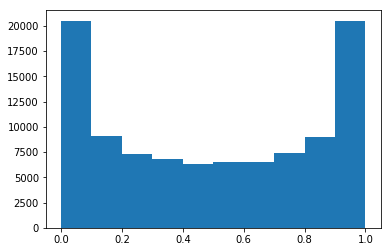

In [16]:
num_figs = 100
initial_conditions = np.random.uniform(size=num_figs)
ts_length = 100_000
x_vec = np.empty(ts_length)

for x0 in initial_conditions:
    quadmap_series(x0, ts_length, x_vec)
    fig, ax = plt.subplots()
    ax.hist(x_vec)
    plt.show()


